In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from utils.data import  DataLoader
from utils.metrics import calc_metrics
from utils.visulization import plot_confusion_matrix

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# load and split the data

In [2]:
dataset = "filtered"

if dataset == "filtered":
    filename='encoded/encoded_filtered_train_data_with_encoded_y.csv'
    test_filename='encoded/encoded_test_data_with_encoded_y.csv'


In [3]:
dl = DataLoader("./config.json")
dl.load_csv_data(filename=filename, test_filename=test_filename)
train_data = dl.get_data(include_target_column = True)
test_data = dl.get_test_data(include_target_column = True)
#train_data.info()
# split the data
X_train, y_train = dl.get_features_and_target(train_data)
X_test, y_test = dl.get_features_and_target(test_data)
column_names = X_train.columns

#this doesn't change the results
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)

loading test data from: C:\Users\dujem\PycharmProjects\bank-marketing\data\encoded/encoded_test_data_with_encoded_y.csv
loading data from: C:\Users\dujem\PycharmProjects\bank-marketing\data\encoded/encoded_filtered_train_data_with_encoded_y.csv
memory occupation before data type conversion: 13.82 MB
memory occupation after data type conversion: 7.04 MB
memory occupation before data type conversion: 1.6 MB
memory occupation after data type conversion: 820.71 KB


# Create and fit classifier

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid = {
    'criterion': ['gini','entropy'], 
    'max_leaf_nodes': np.arange(5,50,10)
}
nfolds=8

In [5]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=nfolds, scoring='recall')
clf.fit(X_train, y_train);
print(clf.best_params_)
clf = clf.best_estimator_
print(type(clf))

{'criterion': 'gini', 'max_leaf_nodes': 5}
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [ ]:
"""
results for:
param_grid = {
    'criterion': ['gini','entropy'], 
    'max_depth': np.arange(1,15)
}
nfolds=8

param_grid = {
    'criterion': ['gini','entropy'], 
    'max_leaf_nodes': np.arange(5,50,10)
}
{'criterion': 'gini', 'max_leaf_nodes': 5}
nfolds=8

"""

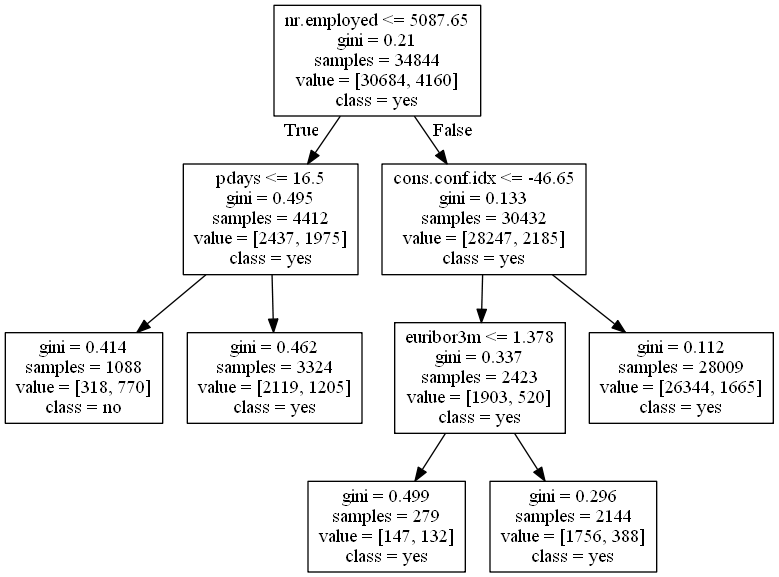

In [6]:
#plot decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=column_names,  
                                class_names=['yes', 'no'])
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
import pydotplus
from IPython.display import Image
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Make predictions on test set and display evaluation results

In [7]:
#prediction
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [8]:
calc_metrics(y_test, y_pred)
#plot_confusion_matrix(y_test, y_pred, title="Confusion matrix");

Auc:0.5930807462877841
Prec:0.6846153846153846
Rec:0.1973392461197339
Acc:0.9021607186210245
F1:0.306368330464716
AP:0.22298689296184543


In [9]:
"""
Without scaling
Auc:0.5930807462877841
Prec:0.6846153846153846
Rec:0.1973392461197339
Acc:0.9021607186210245
F1:0.306368330464716
AP:0.22298689296184543
"""

'\nWithout scaling\nAuc:0.5930807462877841\nPrec:0.6846153846153846\nRec:0.1973392461197339\nAcc:0.9021607186210245\nF1:0.306368330464716\nAP:0.22298689296184543\n'

area under the curve of class  0 : 0.5259282590973097
area under the curve of class  1 : 0.7196235980453362


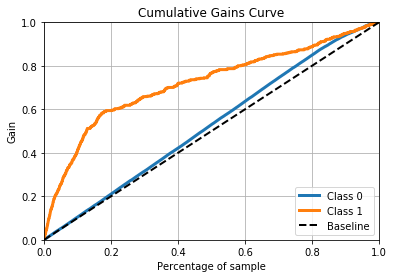

((array([0.00000000e+00, 2.42777373e-04, 4.85554746e-04, ...,
         9.99514445e-01, 9.99757223e-01, 1.00000000e+00]),
  array([0.00000000e+00, 2.72628135e-04, 5.45256270e-04, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00])),
 (array([0.00000000e+00, 2.42777373e-04, 4.85554746e-04, ...,
         9.99514445e-01, 9.99757223e-01, 1.00000000e+00]),
  array([0.        , 0.00221729, 0.00221729, ..., 1.        , 1.        ,
         1.        ])))

In [10]:
from utils.metrics import plot_cumulative_gain
plot_cumulative_gain(y_test, y_pred_proba)